In [70]:
# MNIST Dataset
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [71]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [72]:
print(x_train.shape)    #28 pixels
y_train          #corresponding labels

(60000, 28, 28)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

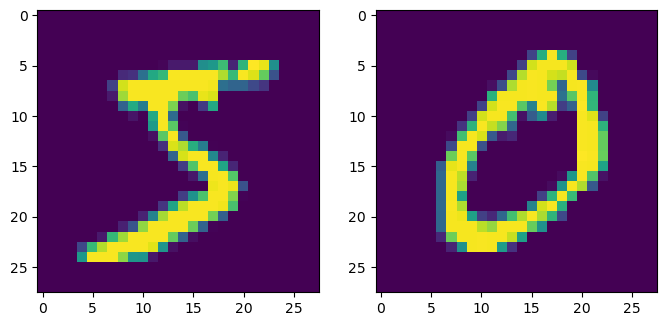

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(x_train[0])

plt.subplot(1,2,2)
plt.imshow(x_train[1])

In [74]:
# normalization range(0-1)
x_train = x_train/255
x_test = x_test/255 

In [75]:
model = Sequential()
# converting higher-demensional array into 1D
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation="relu")) #hidden layer
model.add(Dense(10,activation="softmax")) #output layer


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [78]:
history = model.fit(x_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8629 - loss: 0.4816 - val_accuracy: 0.9559 - val_loss: 0.1523
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9621 - loss: 0.1311 - val_accuracy: 0.9672 - val_loss: 0.1112
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9756 - loss: 0.0848 - val_accuracy: 0.9714 - val_loss: 0.0996
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9808 - loss: 0.0641 - val_accuracy: 0.9713 - val_loss: 0.0980
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9863 - loss: 0.0461 - val_accuracy: 0.9739 - val_loss: 0.0911


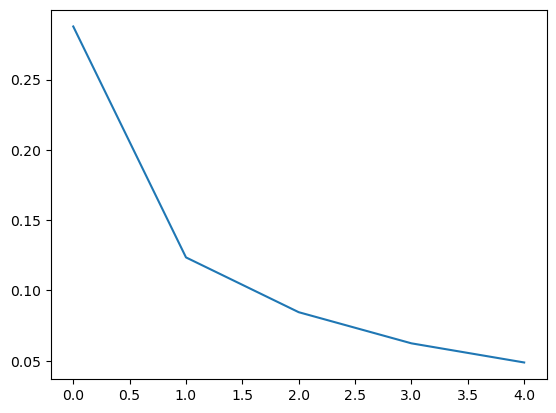

In [79]:
plt.plot(history.history["loss"])

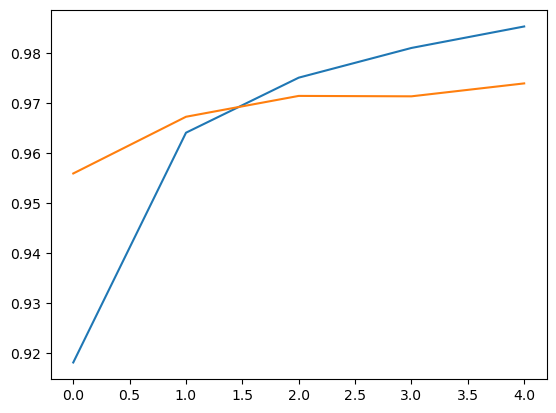

In [80]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [81]:
y_prob = model.predict(x_test)
model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step


array([[5.95111516e-08, 1.97163548e-08, 1.03422586e-04, ...,
        9.99483287e-01, 2.62457729e-06, 4.85945293e-06],
       [2.54170351e-09, 2.25059903e-05, 9.99973953e-01, ...,
        6.53841198e-14, 3.38972700e-06, 2.60491617e-14],
       [1.06495906e-06, 9.99195218e-01, 1.07119398e-04, ...,
        2.88916635e-04, 2.69523967e-04, 8.97038262e-06],
       ...,
       [2.90058515e-12, 2.05410723e-11, 4.08864227e-11, ...,
        6.20153060e-07, 2.32328966e-06, 1.21795074e-05],
       [2.54909704e-10, 3.90761035e-10, 1.52917349e-11, ...,
        9.19229970e-10, 6.76551417e-06, 2.52230164e-11],
       [4.81267637e-10, 2.17522493e-11, 2.28682462e-10, ...,
        2.83048214e-15, 7.76427707e-12, 2.77684282e-11]], dtype=float32)

In [82]:
y_pred = y_prob.argmax(axis=1)       #finds the index of the maximum probability along axis 1

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.974

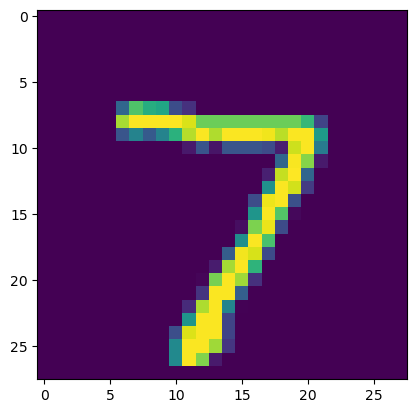

In [85]:
plt.imshow(x_test[0])

In [87]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([7])